<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/ode1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

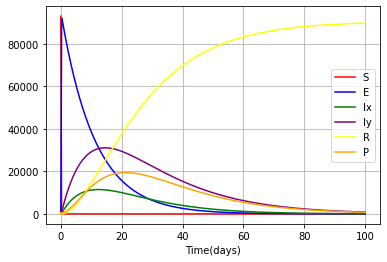

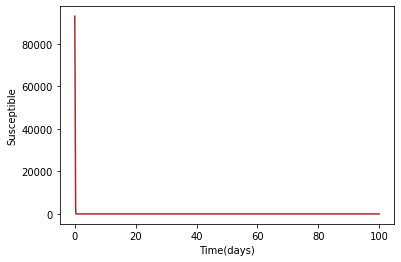

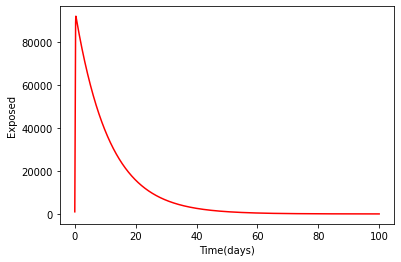

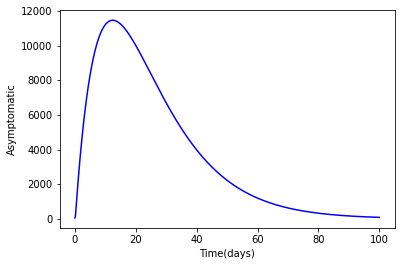

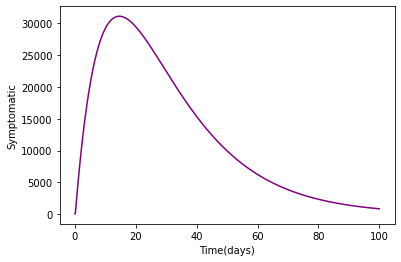

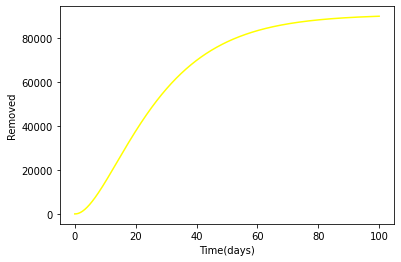

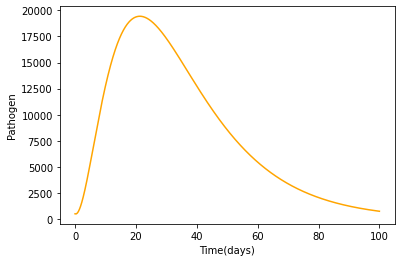

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Description of model parameters
def covid(x,t):
    b = 0.00018
    u = 0.00004563
    up = 0.1724
    alpha1 = 0.10
    alpha2 = 0.10
    b1 = 0.00414
    b2 = 0.0115
    k = 0.7
    w = 0.0051
    q = 0.09
    pr = 0.0018
    rc1 = 0.05
    rc2 = 0.0714
    ns = 0.1
    na = 0.05
    
    s = x[0]
    e = x[1]
    ia = x[2]
    ib = x[3]
    r = x[4]
    p = x[5]
    q1 = b1*s*p/(1+alpha1*p)
    q2 = (b2*s*ia+b2*s*ia*ib)/(1+alpha2*ia+alpha2*ib)
    dsdt = b-q1-q2+w*e-u*s
    dedt = q1 + q2 -w*e-u*e-q*e
    diadt = (1-k)*q*e-(u+pr)*ia-rc2*ia
    dibdt = k*q*e-(u+pr)*ib-rc1*ib
    drdt = rc1*ib+rc2*ia-u*r
    dpdt = na*ia+ns*ib-up*p
    return [dsdt, dedt, diadt,dibdt,drdt,dpdt]

# initial number of infected and recovered individuals

x0 = [93000,1000,50,50,0,500]
t = np.linspace(0,100,10000)
x = odeint(covid,x0,t)

s = x[:,0]
e = x[:,1]
ia = x[:,2]
ib = x[:,3]
r = x[:,4]
p = x[:,5]

plt.plot(t, s, "red", label= "S")
plt.plot(t, e, "blue", label="E")
plt.plot(t, ia, "green", label ="Ix")
plt.plot(t,ib, "purple", label= "Iy")
plt.plot(t,r, "yellow", label = "R")
plt.plot(t,p, "orange", label = "P")
plt.xlabel("Time(days)")
plt.grid()
plt.legend()
plt.show()

plt.plot(t, s, "brown")
plt.xlabel("Time(days)")
plt.ylabel("Susceptible")
plt.show()

plt.plot(t, e, "red")
plt.xlabel("Time(days)")
plt.ylabel("Exposed")
plt.show()

plt.plot(t, ia, "blue")
plt.xlabel("Time(days)")
plt.ylabel("Asymptomatic")
plt.show()

plt.plot(t, ib, "purple")
plt.xlabel("Time(days)")
plt.ylabel("Symptomatic")
plt.show()

plt.plot(t, r, "yellow")
plt.xlabel("Time(days)")
plt.ylabel("Removed")
plt.show()

plt.plot(t, p, "orange")
plt.xlabel("Time(days)")
plt.ylabel("Pathogen")
plt.show()

